In [56]:
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/AUC.csv")

# Data Cleaning

In [58]:
df.duplicated().sum()

0

In [59]:
df.isnull().sum()

,0
name,0
author,0
narrator,0
time,0
releasedate,0
language,0
stars,0
price,0


# Data Pre-processing

In [60]:
df.sample(5)

,name,author,narrator,time,releasedate,language,stars,price
6056,"Alvin Ho: Allergic to the Great Wall, the Forb...",Writtenby:LenoreLook,Narratedby:EverettePlen,2 hrs and 12 mins,15-09-20,English,Not rated yet,553.00
18120,Entdecker (ZEIT Geschichte),Writtenby:DIEZEIT,Narratedby:MartinSailer,1 hr and 51 mins,15-02-11,german,Not rated yet,166.00
63694,The Tao of Physics,Writtenby:FritjofCapra,Narratedby:MichaelMcConnohoi,3 hrs and 12 mins,14-01-00,English,5 out of 5 stars10 ratings,74.00
72320,"Сердце Терновника, или Фаворитка эльфийского и...",Writtenby:EkaterinaLorinova,Narratedby:TatyanaChernichkina,12 hrs and 12 mins,01-02-22,russian,Not rated yet,234.00
43437,Someone New,Writtenby:LauraKneidl,Narratedby:CarolinSophieGöbel,7 hrs and 30 mins,28-01-19,german,Not rated yet,401.00


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [62]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         87489 non-null  object 
 1   author       87489 non-null  object 
 2   narrator     87489 non-null  object 
 3   time         87489 non-null  object 
 4   releasedate  87489 non-null  object 
 5   language     87489 non-null  object 
 6   stars        87489 non-null  object 
 7   price        78015 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.3+ MB


In [63]:
df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')
df.info()

<ipython-input-63-a4293d992794>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87489 non-null  object        
 1   author       87489 non-null  object        
 2   narrator     87489 non-null  object        
 3   time         87489 non-null  object        
 4   releasedate  87489 non-null  datetime64[ns]
 5   language     87489 non-null  object        
 6   stars        87489 non-null  object        
 7   price        78015 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 5.3+ MB


In [64]:
df['year'] = df['releasedate'].dt.year

In [68]:
df['language'].value_counts()

,count
language,
English,61884
german,8295
spanish,3496
japanese,3167
italian,2694
french,2386
russian,1804
danish,935
portuguese,526


In [72]:
language_to_remove = ['mandarin_chinese', 'icelandic', 'hungarian', 'urdu', 'afrikaans', 'czech', 'turkish', 'greek', 'arabic', 'norwegian', 'galician', 'bulgarian', 'korean', 'slovene', 'hebrew', 'basque', 'telugu', 'lithuanian', 'ukrainian', 'romanian']
df = df[~df['language'].isin(language_to_remove)]


# Visualisasi Data

<Axes: xlabel='language'>

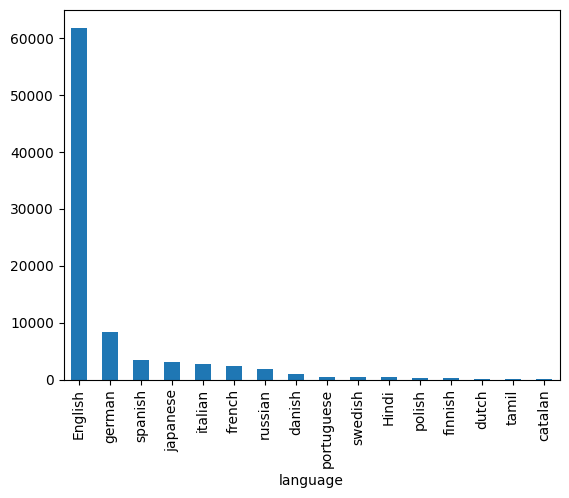

In [73]:
df['language'].value_counts().plot(kind='bar')

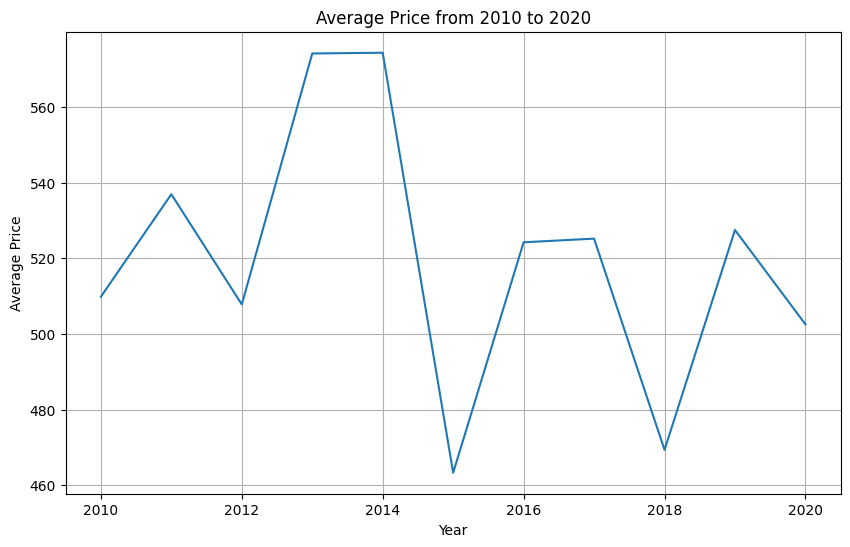

In [66]:
df_filtered = df[(df['year'] >= 2010) & (df['year'] <= 2020)]

price_by_year = df_filtered.groupby('year')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(price_by_year.index, price_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Price from 2010 to 2020")
plt.grid(True)
plt.show()
